In [24]:
!pip install feature-engine

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

In [26]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    "BsmtQual",
    "FireplaceQu",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [27]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [28]:
X_train.isnull().mean()

LotFrontage    0.184932
MasVnrArea     0.004892
BsmtQual       0.023483
FireplaceQu    0.467710
GarageYrBlt    0.052838
dtype: float64

In [29]:
# we call the imputer from Feature-engine
# pecifying the arbitrary value

imputer = ArbitraryNumberImputer(arbitrary_number=-999)

In [30]:
# we fit the imputer

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999)

In [31]:
# we see that the imputer found the numerical variables

imputer.variables_

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [32]:
# here we can see the arbitrary value

imputer.arbitrary_number

-999

In [33]:
# Feature-engine returns a dataframe

X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

X_train_t.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt
64,-999.0,573.0,Gd,NaN,1998.0
682,-999.0,0.0,Gd,Gd,1996.0
960,50.0,0.0,TA,NaN,-999.0
1384,60.0,0.0,TA,NaN,1939.0
1100,60.0,0.0,TA,NaN,1930.0


In [34]:
# let's check that the numerical variables don't
# contain NA any more

X_train_t[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [35]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerical variables

imputer = ArbitraryNumberImputer(
    arbitrary_number=-999, variables=["LotFrontage", "MasVnrArea"]
)

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [36]:
# now the imputer uses only the variables we indicated

imputer.variables_

['LotFrontage', 'MasVnrArea']

In [37]:
# and we can see the value assigned to each variable
imputer.arbitrary_number

-999

In [38]:
# Feature-engine returns a dataframe

X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# let's check null values are gone
X_train_t[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

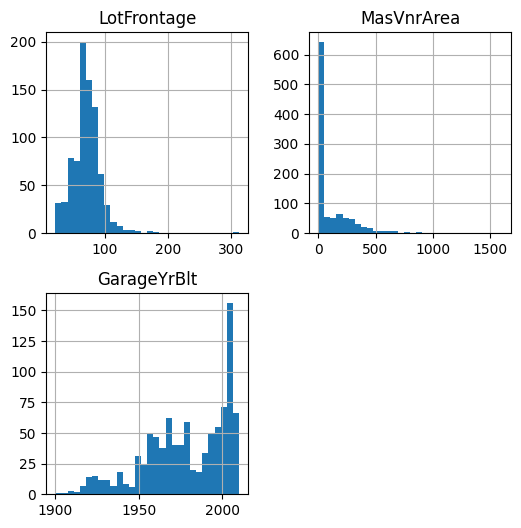

In [39]:
# let's look at the distributions to determine the
# arbitraty values to use

X_train.hist(bins=30, figsize=(6, 6))
plt.show()

In [40]:
imputer = ArbitraryNumberImputer(
    imputer_dict={
        "LotFrontage": -999,
        "MasVnrArea": -999,
        "GarageYrBlt": -1,
    }
)

imputer.fit(X_train)

ArbitraryNumberImputer(imputer_dict={'GarageYrBlt': -1, 'LotFrontage': -999,
                                     'MasVnrArea': -999})

In [41]:
# now the imputer uses only the variables we indicated

imputer.variables_

dict_keys(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [42]:
imputer.imputer_dict_

{'LotFrontage': -999, 'MasVnrArea': -999, 'GarageYrBlt': -1}

In [43]:
# Feature-engine returns a dataframe

X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# let's check null values are gone
X_train_t[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

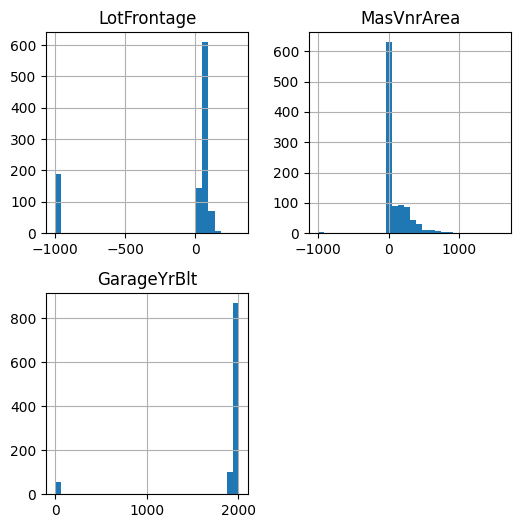

In [44]:
# let's check the histograms of the variables
# after the imputation

X_train_t[imputer.variables_].hist(bins=30, figsize=(6, 6))
plt.show()